<a href="https://colab.research.google.com/github/TopeOlafisoye/Video-Game-Analysis/blob/main/Video_Games_Sales_Visualization_and_Prediction_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Import

In [1]:
# Importing the required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import missingno as mn
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm, skew
import seaborn as sns

# Visualization Packages Importing
from plotly import express as px
from plotly import graph_objects as go
from plotly.subplots import make_subplots 



In [2]:
# Importing the dataset
df = pd.read_csv('/content/sample_data/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.shape

(16598, 11)

In [4]:
# To view the columns with missing values
df.isnull().sum()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
df.dropna(inplace=True)

In [7]:
df['Year'] = df['Year'].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int64  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


##Data Visualization

In [9]:
df1 = df.copy()

1.What are the Sales & Share of games in different genre?

In [10]:
genre_counts = list(df1['Genre'].value_counts())
genre_ls = list(df1['Genre'].value_counts().index)
fig = px.pie(df1,values=genre_counts,names=genre_ls, hole=0.5,color_discrete_sequence=px.colors.sequential.Turbo)
fig.update_layout(title_text='Sales Share of games by Genre', title_x=0.5,height = 900)
fig.update_traces(textposition='inside',textinfo='label+percent+value')
fig.show()

The Sales & Share of all around the Video games from year 1980 to 2020 is like Action genre games is mostly sale & 20% it recorded in current market and 2nd highest is Sports genre of 14.1%.

In [11]:
df1['Year'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2003, 1986, 2000, 1995, 2016, 1991,
       1981, 1987, 1980, 1983, 2020, 2017])

**2.In Which Year the Video Games realsed most and what % they hold in market?**

Text(0.5, 1.0, 'Number of video game releases each period')

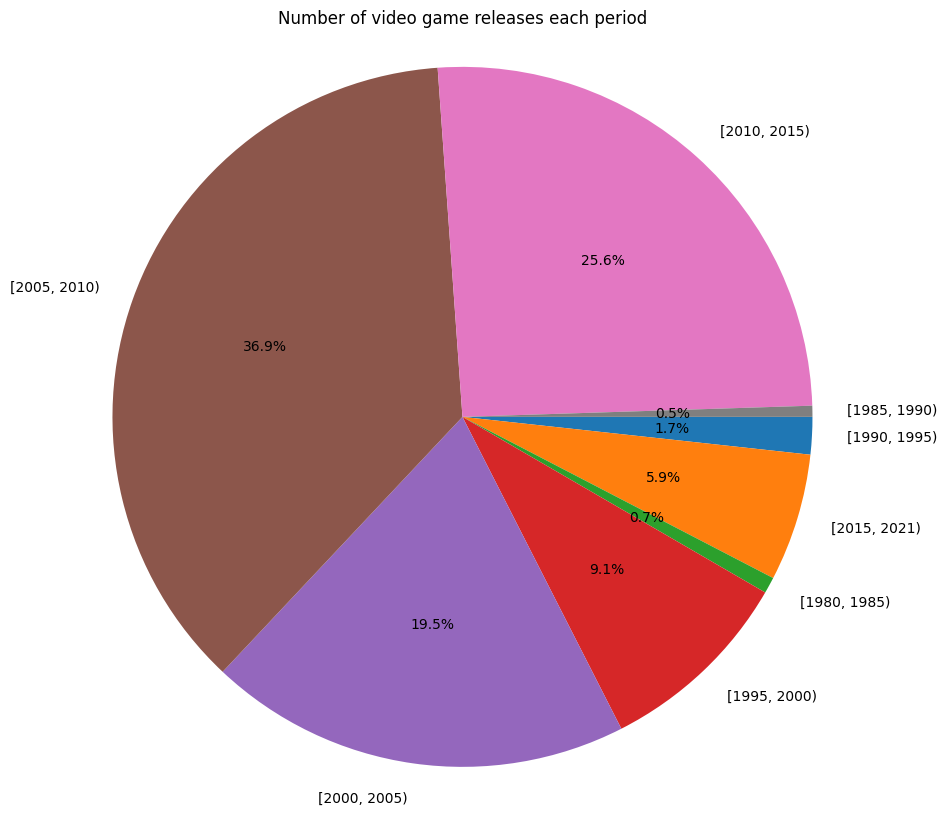

In [12]:
bins = [1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2021]
cats = pd.cut(df1['Year'], bins, right = False)
year = pd.DataFrame(pd.value_counts(cats))    
years = year.sample(frac = 1)
fig = plt.figure(figsize=(20,10)), plt.pie(np.array(years).ravel(), labels = years.index, autopct = '%1.1f%%', counterclock = False);
plt.axis('square')
plt.title('Number of video game releases each period')

**3.What are the Sales of diffrent genres of Games in NA,EU,JP, Global and Other Markets?**

In [13]:
col = ['NA_Sales','EU_Sales', 'JP_Sales','Global_Sales','Other_Sales']
title = ['North America','Europe', 'Japan','Global','Other']
for i,c in enumerate(col):
    genre = df1.groupby('Genre').sum().sort_values(c,ascending=False).reset_index()[['Genre',c]]
    fig = px.bar(genre,x='Genre',y=c,title='Sales of different Genres of games in the {} market'.format(title[i]),
                labels={'Name':'Genre',c:title[i]+' Sales'},color="Genre")
    fig.show()

<ipython-input-13-c9cd558c9c3c>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<ipython-input-13-c9cd558c9c3c>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<ipython-input-13-c9cd558c9c3c>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<ipython-input-13-c9cd558c9c3c>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<ipython-input-13-c9cd558c9c3c>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



The Graph own describe in the Region of North America, Europe, Global and Other Market that the most sales of Action Genre and 2nd most are Sports while the case of Japan is different from others here the Role-playing sales most and 2nd most is Action.

**4.How much of the Number of Popular games available in Platform?**

Text(0.5, 1.0, 'Number of popular games by platform')

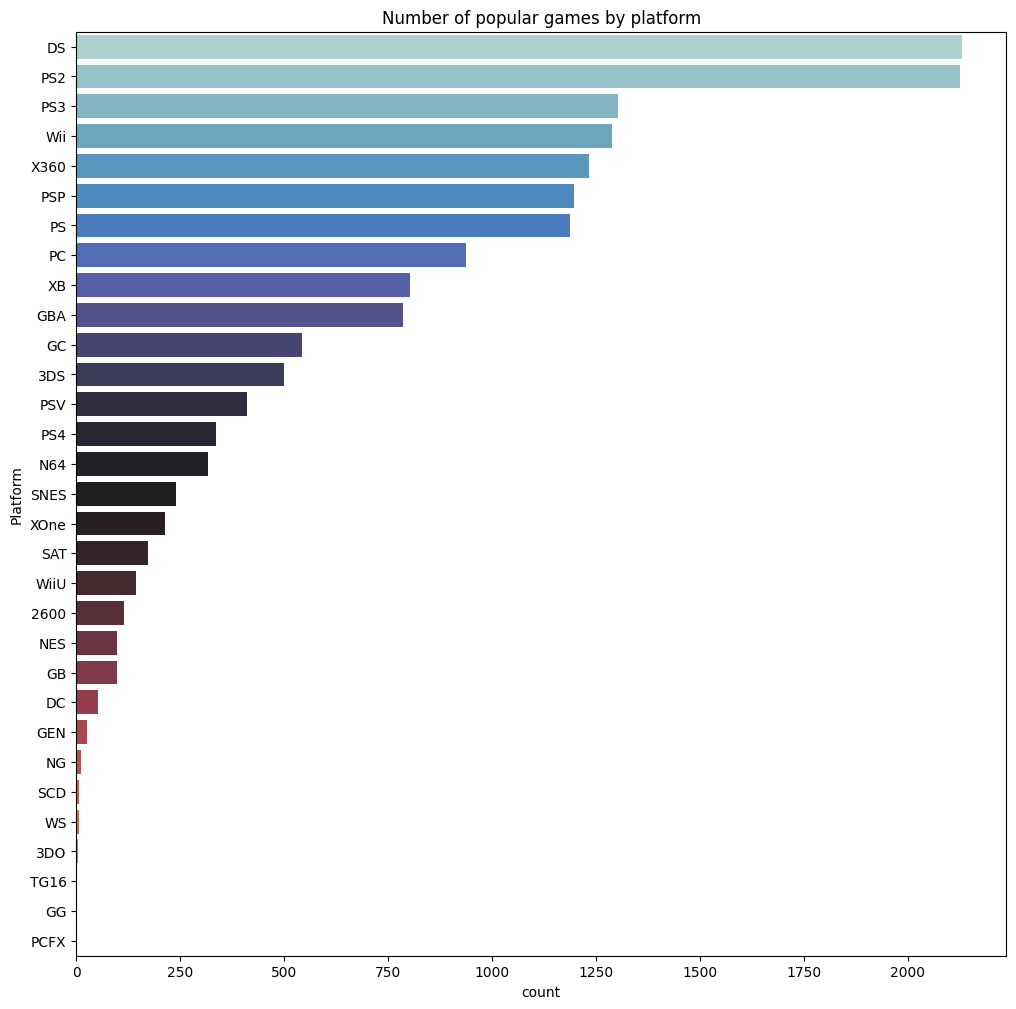

In [14]:
fig = plt.figure(figsize = (12,12))
sns.countplot(y='Platform',order = df1['Platform'].value_counts().index[0:31],data = df1,palette='icefire')
plt.title('Number of popular games by platform')

**5.What are the Top 10 Video Games Publishers in Diffrent Regions?**

In [15]:
# col = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']
# title = ['North America','Europe', 'Japan', 'Rest of the World']
col = ['NA_Sales','EU_Sales', 'JP_Sales','Global_Sales','Other_Sales']
title = ['North America','Europe', 'Japan','Global','Rest of the World']

for i,c in enumerate(col):
    top_10_publisher = df1.groupby('Publisher').sum().sort_values(c, ascending = False).head(10).reset_index()[['Publisher',c]]
    fig = px.bar(top_10_publisher, x='Publisher',y=c,title='Top 10 Video Game Publishers in {}'.format(title[i]), 
       labels={'Name':'Game',c:title[i]}, color="Publisher")
    fig.show()

<ipython-input-15-950fb842bc44>:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<ipython-input-15-950fb842bc44>:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<ipython-input-15-950fb842bc44>:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<ipython-input-15-950fb842bc44>:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<ipython-input-15-950fb842bc44>:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In the Region of North America ,Europe and Global Market the top 5 Publisher games are same which is Nintendo,Electronic Arts, Activision,Sony Computer Entertainment and Ubisoft but in japan the top 5 is like Nintendo,Namco Bandal Games,Konami,Sony and Capcom whereas in Rest of World the scenario is different here the top 5 is like Electronic Arts, Nintendo,Sony,Activision and Take-Two respectively.

**6.What are the Sales of Video games from year 1980-2020?**

In [16]:
fig=px.line(
    df.groupby(df.Year).sum().reset_index(),
    x='Year',
    y=['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales'],
    title='Sum of Sales by Year',
    )
fig.show()

<ipython-input-16-f1f5e48d2bd8>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Early Estimates shows that sales of video games from all around the world in year 1980 to 1995 not even cross 100 trademark but it rise slowly after the year 2000 the sales reach 100 trademark and grows continuosly in year 2005 to 2010. The year 2010 is highest among all the year but it declined after that in year 2015 and it again comes same line which was in year 1980.

**7.What are the Average Sales of Video games from year 1980-2020?**

In [17]:
fig=px.line(
    df.groupby(df.Year).mean().reset_index(),
    x='Year',
    y=['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales'],
    title='Average of Sales by Year',
    )
fig.show()

<ipython-input-17-be156dcd3412>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



The Average of Global,North America,Japan,Europe and Other sales is highest in between the year 1989-1990. The line then start down after that and the average of all Sales in world lies on same line. But again some of Sales start in between the year 2015-2016.

**8.What are the Top 10 Best Selling Video Games around the World?**

In [18]:
# col = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']
# title = ['North America','Europe', 'Japan', 'Rest of the World']
col = ['NA_Sales','EU_Sales', 'JP_Sales','Global_Sales','Other_Sales']
title = ['North America','Europe', 'Japan','Global','Rest of the World']


for i,c in enumerate(col):
    sale_df = df1.groupby('Name').sum().sort_values(c,ascending=False).head(10).reset_index()[['Name',c]]
    fig = px.bar(sale_df,x='Name',y=c,title='The 10 best selling games in {}'.format(title[i]),
                labels={'Name':'Games Name',c:title[i]+' Sales'},color='Name')
    fig.show()

<ipython-input-18-27b2312d32ec>:8: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<ipython-input-18-27b2312d32ec>:8: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<ipython-input-18-27b2312d32ec>:8: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<ipython-input-18-27b2312d32ec>:8: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<ipython-input-18-27b2312d32ec>:8: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Conclusion

Wii Sports, made the most sales worldwide. This is echoed by both NA and EU regions. However, it is a different story in other regions, with Pokemon Red/Pokemon Blue dominating in Japan and Grand Theft Auto: San Andreas everywhere else

50% of top 10 games utilized the Wii Platform, making it one of the most successful consoles. This could be because of the fact that the Wii system was one of the most innovative consoles of its time by taking advantage of motion controls

Action, Sports and Misc are the most popular genres with high game titles as well as high global sales made

Nintendo snatched the spot for the Publisher that made the most global sales. Unsurprising is the fact that the top 10 games are all published by Nintendo!

In [19]:
top_sales = df1.sort_values(by=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], ascending=False).head(10)

# ['NA_Sales', '', '', '']
dicts_name = {
    'NA_Sales' : "North America Sales ( In Millions)",
    'EU_Sales' : "Europe Sales ( In Millions)",
    'JP_Sales' : "Japan Sales ( In Millions)",
    'Other_Sales' : "Other Sales ( In Millions)",
}

for (key, title) in dicts_name.items():
    
    fig = px.sunburst(top_sales, path=['Genre', 'Publisher', 'Platform'], values=key, title= 'Top Selling by '+ title)
    
    fig.update_layout(
        grid= dict(columns=2, rows=2),
        margin = dict(t=40, l=2, r=2, b=5)
    )

    fig.show()

<ipython-input-20-6320ca464269>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



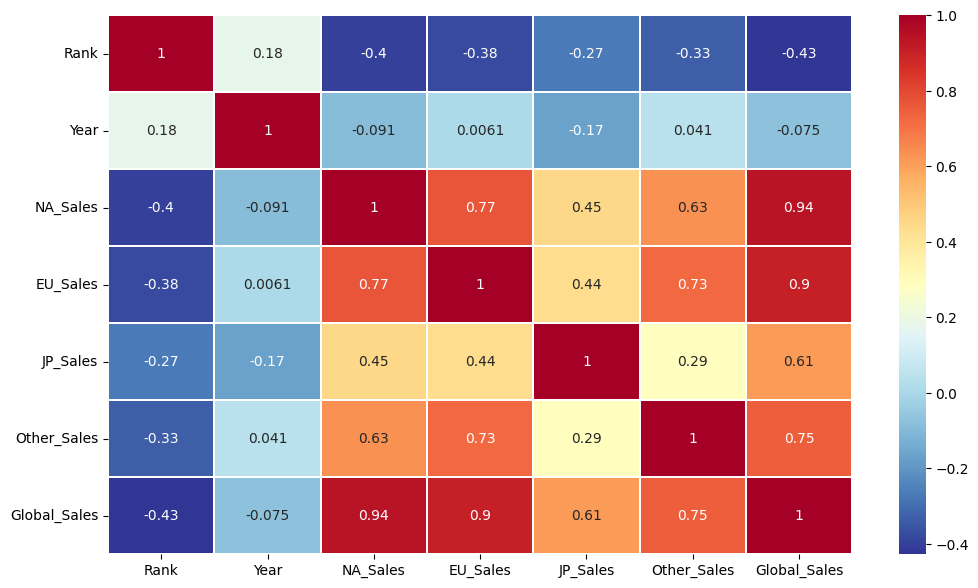

In [20]:
corr_ = df1.corr()

plt.figure(figsize=(12, 7))

sns.heatmap(corr_, annot=True, linewidths=.2, cmap='RdYlBu_r')

plt.show()

#Feature Selection/Engineering

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [22]:
df['Platform'] = le.fit_transform(df['Platform'].astype('str'))
df['Genre'] = le.fit_transform(df['Genre'].astype('str'))
df['Publisher'] = le.fit_transform(df['Publisher'].astype('str'))






In [55]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,26,2006,10,359,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,11,1985,4,359,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,26,2008,6,359,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,26,2009,10,359,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,5,1996,7,359,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,6,2002,4,269,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,7,2003,8,241,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,16,2008,6,21,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,4,2010,5,8,0.00,0.01,0.00,0.00,0.01


Feature Selection

In [23]:
#extracting the feature vector and the dependant variable vector

columns = ["Platform", "Genre", "Publisher", "NA_Sales", "EU_Sales"]

In [24]:
X = df[list(columns)].values
y = df["Global_Sales"].values

In [25]:
X[:5], y[:5]

(array([[ 26.  ,  10.  , 359.  ,  41.49,  29.02],
        [ 11.  ,   4.  , 359.  ,  29.08,   3.58],
        [ 26.  ,   6.  , 359.  ,  15.85,  12.88],
        [ 26.  ,  10.  , 359.  ,  15.75,  11.01],
        [  5.  ,   7.  , 359.  ,  11.27,   8.89]]),
 array([82.74, 40.24, 35.82, 33.  , 31.37]))

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [57]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13032, 5), (13032,), (3259, 5), (3259,))

In [58]:
#scaling the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
# apply same transformation to test data
X_test = scaler.transform(X_test)

#Model Development

##1. Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

# Import r2 score for Calculation
from sklearn.metrics import r2_score
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [30]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
# Predicting Cross Validation Score the Test set results

cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.95361674950215
R2_score (train):  0.9577583588334548
R2_score (test):  0.9799254275588078
RMSE:  0.2804511828430449


##DecisionTreeRegressor

In [31]:
# Fitting the Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [32]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

CV:  0.898987823907069
R2_score (train):  0.9971313488797974
R2_score (test):  0.8129688001474119
RMSE:  0.8560342751253301


##RandomForestRegressor

In [33]:
# Fitting the Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor_rf.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=500, random_state=0)

In [34]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = regressor_rf, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  0.9398955981439375
R2_score (train):  0.9908673038047692
R2_score (test):  0.818342497189106
RMSE:  0.8436470530812749


##KNeighbor

In [35]:
from sklearn.neighbors import KNeighborsRegressor
kRange = range(1,15,1)

scores_list = []
for i in kRange:
    regressor_knn = KNeighborsRegressor(n_neighbors = i)
    
    regressor_knn.fit(X_train,y_train)
    pred = regressor_knn.predict(X_test)
    scores_list.append(r2_score(y_test,pred))
    
# Predicting Cross Validation Score
cv_regressor_knn = cross_val_score(estimator = regressor_knn, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_regressor_knn_train = regressor_knn.predict(X_train)
r2_score_regressor_knn_train = r2_score(y_train, y_pred_regressor_knn_train)

# Predicting R2 Score the Test set results
y_pred_regressor_knn_test = regressor_knn.predict(X_test)
r2_score_regressor_knn_test = r2_score(y_test, y_pred_regressor_knn_test)

# Predicting RMSE the Test set results
rmse_regressor_knn = (np.sqrt(mean_squared_error(y_test, y_pred_regressor_knn_test)))
print('CV: ', cv_regressor_knn.mean())
print('R2_score (train): ', r2_score_regressor_knn_train)
print('R2_score (test): ', r2_score_regressor_knn_test)
print("RMSE: ", rmse_regressor_knn)

CV:  0.9351900162267643
R2_score (train):  0.9480439000151826
R2_score (test):  0.7330909866506067
RMSE:  1.0226234417063973


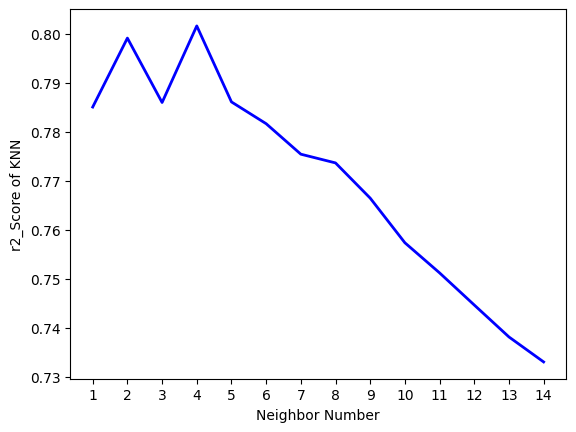

In [36]:
plt.plot(kRange, scores_list, linewidth=2, color='blue')
plt.xticks(kRange)

plt.xlabel('Neighbor Number')
plt.ylabel('r2_Score of KNN')
plt.show()   

##SVM linear & RBF

In [37]:
from sklearn.svm import SVR

svr_linear = SVR(kernel='linear')

svr_rbf = SVR(kernel='rbf')

svr_linear.fit(X_train, y_train)
svr_rbf.fit(X_train, y_train)

pred_linear = svr_linear.predict(X_test)
pred_rbf = svr_rbf.predict(X_test)
# Predicting Cross Validation Score for linear SVM
cv_svr_linear = cross_val_score(estimator = svr_linear, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results for svr_linear
y_pred_svr_linear_train = svr_linear.predict(X_train)
r2_score_svr_linear_train = r2_score(y_train, y_pred_svr_linear_train)

# Predicting R2 Score the Test set results for svr_linear
y_pred_svr_linear_test = svr_linear.predict(X_test)
r2_score_svr_linear_test = r2_score(y_test, y_pred_svr_linear_test)

# Predicting RMSE the Test set results for svr_linear
rmse_svr_linear = (np.sqrt(mean_squared_error(y_test, y_pred_svr_linear_test)))
print('CV: ', cv_svr_linear.mean())
print('R2_score (train): ', r2_score_svr_linear_train)
print('R2_score (test): ', r2_score_svr_linear_test)
print("RMSE: ", rmse_svr_linear)

# Predicting Cross Validation Score for SVM RBF
cv_svr_rbf = cross_val_score(estimator = svr_rbf , X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results for SVM RBF
y_pred_svr_rbf_train = svr_rbf .predict(X_train)
r2_score_svr_rbf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the Test set results for SVM RBF
y_pred_svr_rbf_test = svr_rbf .predict(X_test)
r2_score_svr_rbf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results for SVM RBF
rmse_svr_rbf = (np.sqrt(mean_squared_error(y_test, y_pred_svr_rbf_test)))
print('CV: ', cv_svr_rbf.mean())
print('R2_score (train): ', r2_score_svr_rbf_train)
print('R2_score (test): ', r2_score_svr_rbf_test)
print("RMSE: ", rmse_svr_rbf)



CV:  0.9456342528999941
R2_score (train):  0.9486236279228036
R2_score (test):  0.9817016634846655
RMSE:  0.2677564424019775
CV:  0.6754986211966778
R2_score (train):  0.9908673038047692
R2_score (test):  0.818342497189106
RMSE:  1.5375666419811937


##XGBOOST REGRESSROR


In [38]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)



# Predicting Cross Validation Score for linear SVM
cv_xgb = cross_val_score(estimator = xgb, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_xgb_train = xgb.predict(X_train)
r2_score_xgb_train = r2_score(y_train, y_pred_xgb_train)

# Predicting R2 Score the Test set results
y_pred_xgb_test = xgb.predict(X_test)
r2_score_xgb_test = r2_score(y_test, y_pred_xgb_test)

# Predicting RMSE the Test set results
rmse_xgb = (np.sqrt(mean_squared_error(y_test, y_pred_xgb_test)))
print('CV: ', cv_xgb.mean())
print('R2_score (train): ', r2_score_xgb_train)
print('R2_score (test): ', r2_score_xgb_test)
print("RMSE: ", rmse_xgb)

CV:  0.9483454834363446
R2_score (train):  0.9925152741501739
R2_score (test):  0.8394730605007295
RMSE:  0.7930637273437314


#Error Measurement

In [39]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
          ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean()), 
          ('KNeighbor', rmse_regressor_knn, r2_score_regressor_knn_train, r2_score_regressor_knn_test, cv_regressor_knn.mean()),
          ('SVM linear', rmse_svr_linear, r2_score_svr_linear_train, r2_score_svr_linear_test, cv_svr_linear.mean()),
          ('SVM RBF(Radial Basis Function)', rmse_svr_rbf, r2_score_svr_rbf_train, r2_score_svr_rbf_test, cv_svr_rbf.mean()),
          ('XGBOOST Regressor', rmse_xgb, r2_score_xgb_train, r2_score_xgb_test, cv_xgb.mean())
         ]

In [40]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,0.280451,0.957758,0.979925,0.953617
1,Decision Tree Regression,0.856034,0.997131,0.812969,0.898988
2,Random Forest Regression,0.843647,0.990867,0.818342,0.939896
3,KNeighbor,1.022623,0.948044,0.733091,0.935190
4,SVM linear,0.267756,0.948624,0.981702,0.945634
5,SVM RBF(Radial Basis Function),1.537567,0.990867,0.818342,0.675499
6,XGBOOST Regressor,0.793064,0.992515,0.839473,0.948345


# Visualizing Model Performance

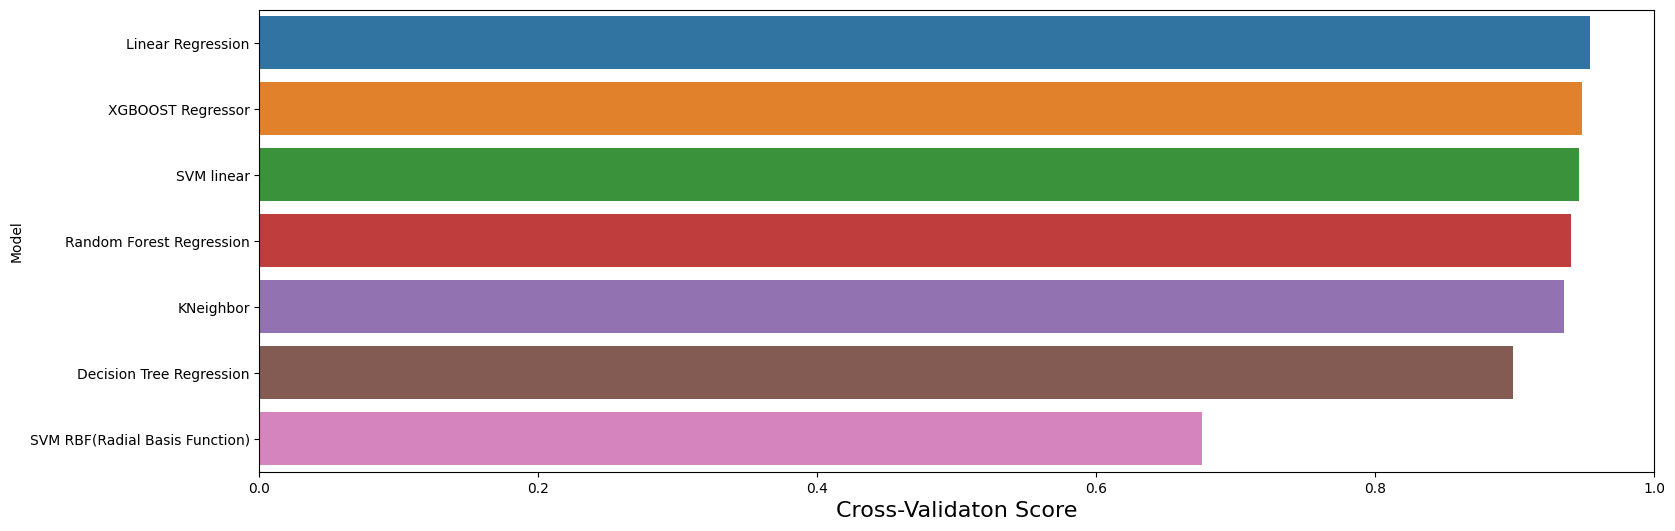

In [41]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
plt.show()

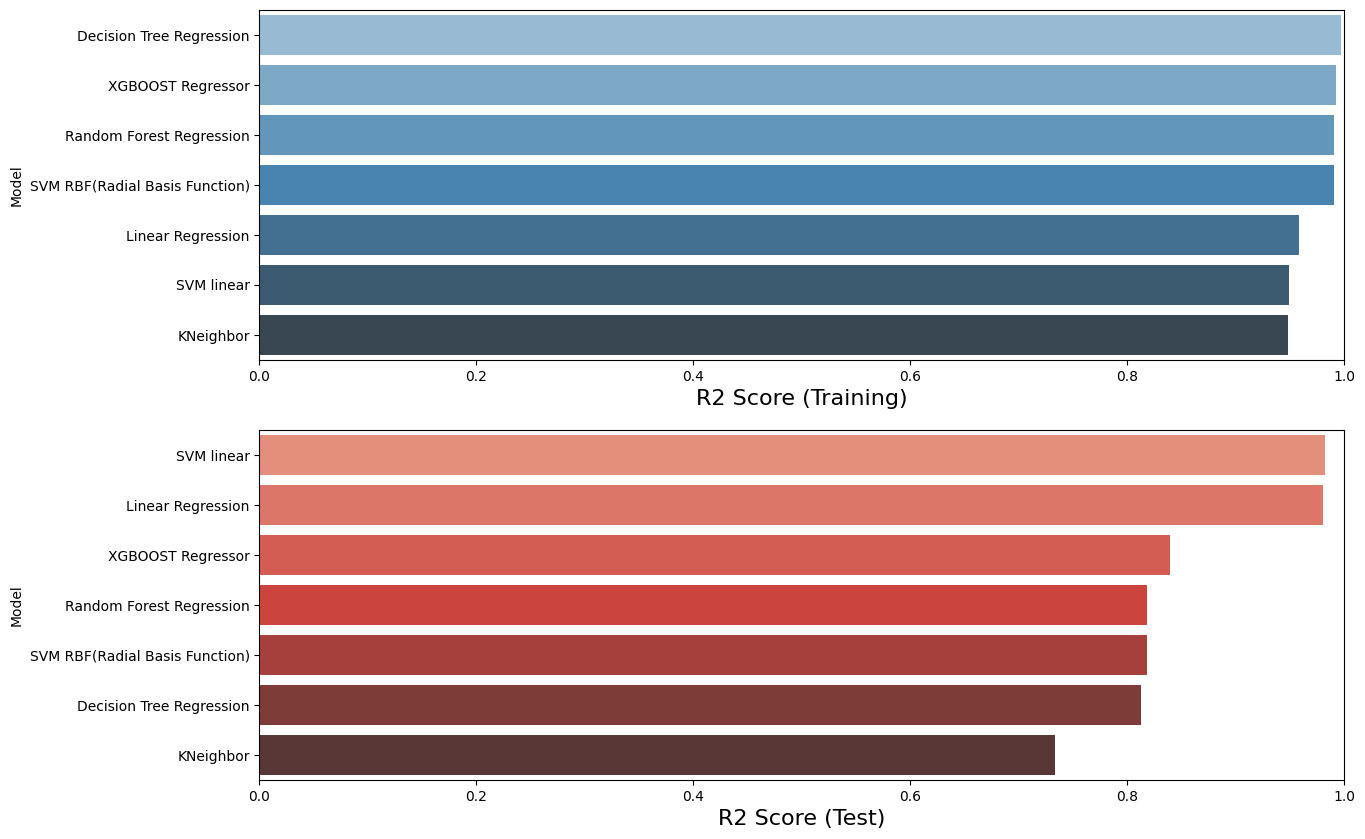

In [42]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)

predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('R2 Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)

plt.show()

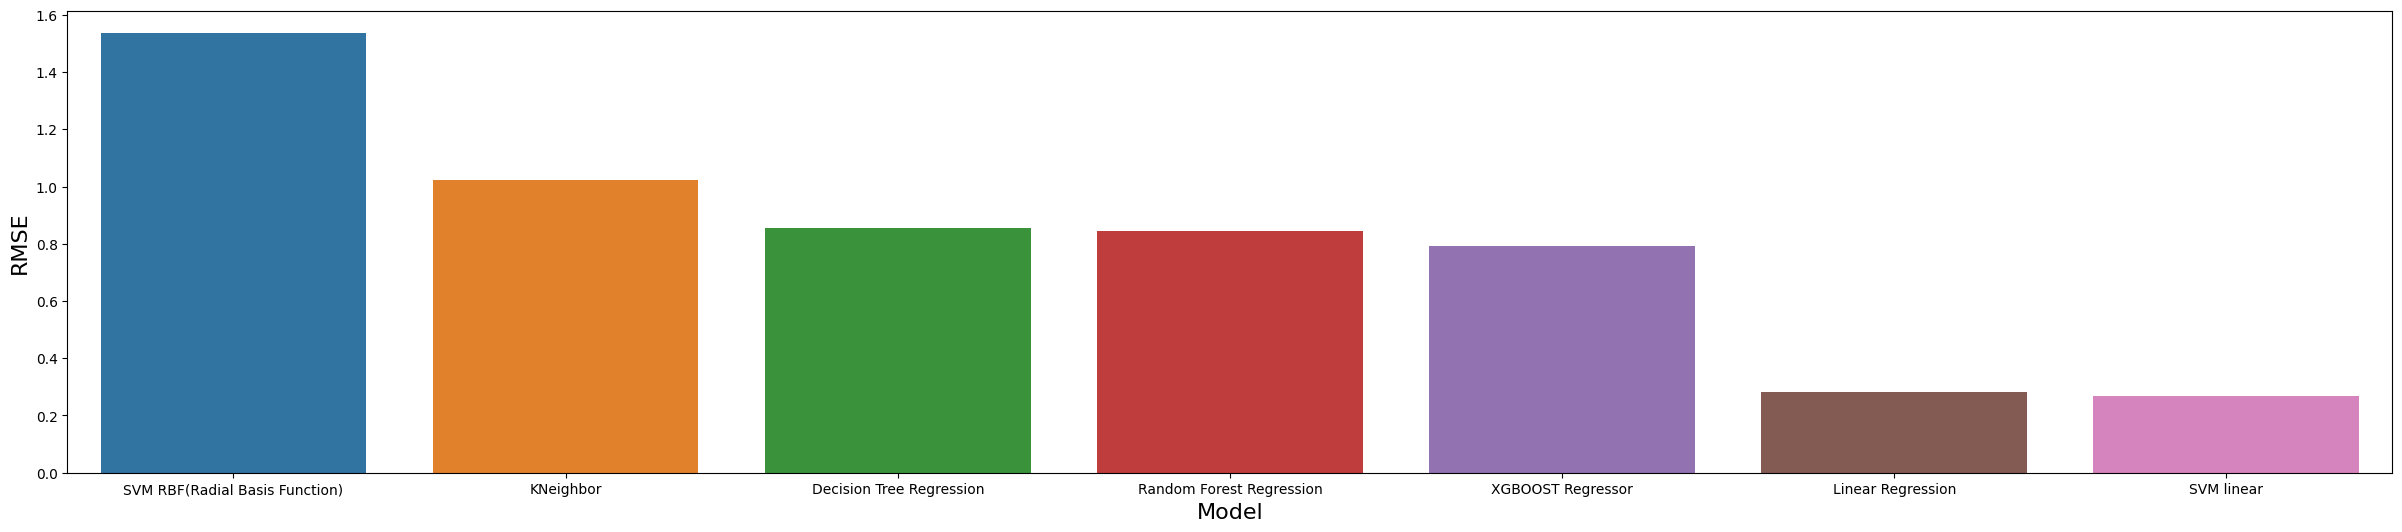

In [54]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(30,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()

6. Conclusion 

In this kernel, I have built 7 regression models using Video games sales Dataset. Then measured and visualized the performance of the models. 